In [1]:
import math
import matplotlib.pyplot as plt

def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def perimeter(p1, p2, p3):
    return distance(p1, p2) + distance(p2, p3) + distance(p3, p1)

def min_cost_triangulation(points):
    n = len(points)
    dp = [[0] * n for _ in range(n)]
    print('dp:', dp)
    
    for gap in range(2, n):
        print('gap:', gap)
        for i in range(n - gap):
            j = i + gap
            print('i:', i, 'j:', j)
            dp[i][j] = float('inf')
            for k in range(i + 1, j):
                cost = dp[i][k] + dp[k][j] + perimeter(points[i], points[k], points[j])
                print('k:', k, 'cost:', cost)
                dp[i][j] = min(dp[i][j], cost)
                print('dp:', dp)

    return dp[0][n-1], dp

def visualize_triangulation(points, triangulation, title):
    fig, ax = plt.subplots()
    
    # Plot the polygon
    polygon = plt.Polygon(points, fill=None, edgecolor='b')
    ax.add_patch(polygon)
    
    # Plot triangulation
    for i, j, k in triangulation:
        triangle = plt.Polygon([points[i], points[j], points[k]], fill=None, edgecolor='r')
        ax.add_patch(triangle)
    
    # Plot points
    x, y = zip(*points)
    ax.plot(x, y, 'ko')
    
    # Set limits and show the plot
    ax.set_xlim(min(x) - 0.5, max(x) + 0.5)
    ax.set_ylim(min(y) - 0.5, max(y) + 0.5)
    ax.set_aspect('equal')
    plt.title(title)
    plt.show()

def all_triangulations(points):
    n = len(points)
    if n < 3:
        return []
    if n == 3:
        return [[(0, 1, 2)]]
    
    triangulations = []
    for i in range(1, n-1):
        left = all_triangulations(points[:i+1])
        right = all_triangulations(points[i:])
        
        if not left or not right:
            continue
        
        for l in left:
            for r in right:
                triangulation = l + [(0, i, n-1)] + [(x+i, y+i, z+i) for x, y, z in r]
                triangulations.append(triangulation)
    
    return triangulations

def triangulation_cost(points, triangulation):
    return sum(perimeter(points[i], points[j], points[k]) for i, j, k in triangulation)

def extract_optimal_triangulation(points, dp):
    n = len(points)
    def backtrack(i, j):
        if j - i < 2:
            return []
        for k in range(i + 1, j):
            if abs(dp[i][j] - (dp[i][k] + dp[k][j] + perimeter(points[i], points[k], points[j]))) < 1e-6:
                return [(i, k, j)] + backtrack(i, k) + backtrack(k, j)
        # If no triangulation is found (e.g., for a square), return a default triangulation
        if j - i == 3:  # Square case
            return [(i, i+1, j), (i, i+2, j)]
        return []
    return backtrack(0, n - 1)

def solve_and_visualize(points, ALLCases=True):
    print(f"Solving for points: {points}")
    
    # Dynamic Programming solution
    dp_cost, dp = min_cost_triangulation(points)
    optimal_triangulation = extract_optimal_triangulation(points, dp)
    print(f"Minimum cost (dynamic programming): {dp_cost:.4f}")
    print(f"Optimal triangulation: {optimal_triangulation}")
    
    # Visualize optimal triangulation
    if optimal_triangulation:
        visualize_triangulation(points, optimal_triangulation, f'Triangulation, Cost: {dp_cost:.4f}')
    else:
        print("No optimal triangulation found.")
    
    if not ALLCases:
        return
    
    # Generate all triangulations
    all_tri = all_triangulations(points)
    print(f"Total number of triangulations: {len(all_tri)}")
    
    # Visualize all triangulations
    for i, tri in enumerate(all_tri):
        cost = triangulation_cost(points, tri)
        visualize_triangulation(points, tri, f'Triangulation {i+1}, Cost: {cost:.4f}')

def sort_vertices_ccw(points):
    # Find the reference point (the point with the lowest y-coordinate, break ties by x-coordinate)
    reference = min(points, key=lambda p: (p[1], p[0]))
    # Function to calculate the polar angle between the reference point and another point
    def polar_angle(p):
        return math.atan2(p[1] - reference[1], p[0] - reference[0])
    # Sort points by polar angle with respect to the reference point
    sorted_points = sorted(points, key=polar_angle)
    return sorted_points


Test Case 1.1:
Solving for points: [(1, 2), (4, 3), (5, 7), (3, 10), (0, 7)]
dp: [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
gap: 2
i: 0 j: 2
k: 1 cost: 13.688507523218888
dp: [[0, 0, 13.688507523218888, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
i: 1 j: 3
k: 2 cost: 14.799724712947125
dp: [[0, 0, 13.688507523218888, 0, 0], [0, 0, 0, 14.799724712947125, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
i: 2 j: 4
k: 3 cost: 12.848191962583273
dp: [[0, 0, 13.688507523218888, 0, 0], [0, 0, 0, 14.799724712947125, 0], [0, 0, 0, 0, 12.848191962583273], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
gap: 3
i: 0 j: 3
k: 1 cost: 33.2792814362163
dp: [[0, 0, 13.688507523218888, 33.2792814362163, 0], [0, 0, 0, 14.799724712947125, 0], [0, 0, 0, 0, 12.848191962583273], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
k: 2 cost: 31.943394287351047
dp: [[0, 0, 13.688507523218888, 31.943394287351047, 0], [0, 0, 0, 14.799724712947125, 0], [0, 0, 0, 0,

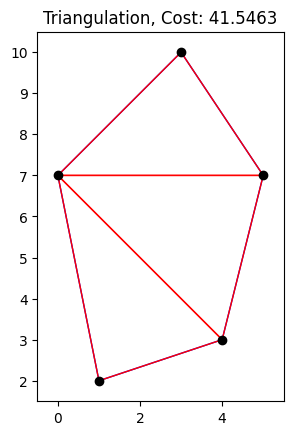

Total number of triangulations: 1


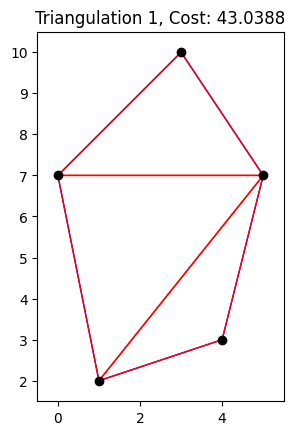

In [2]:
# 1.1
points = [(1, 2) ,(4, 3) ,(5, 7), (3 ,10) ,(0, 7)]
print(f"\nTest Case 1.1:")
solve_and_visualize(points)


Test Case 1.2:
Solving for points: [(-5.5, -2), (4, 0), (15, 7), (2, 10), (-3, 6)]
dp: [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
gap: 2
i: 0 j: 2
k: 1 cost: 45.13526190711721
dp: [[0, 0, 45.13526190711721, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
i: 1 j: 3
k: 2 cost: 36.5781079017172
dp: [[0, 0, 45.13526190711721, 0, 0], [0, 0, 0, 36.5781079017172, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
i: 2 j: 4
k: 3 cost: 37.77254467887913
dp: [[0, 0, 45.13526190711721, 0, 0], [0, 0, 0, 36.5781079017172, 0], [0, 0, 0, 0, 37.77254467887913], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
gap: 3
i: 0 j: 3
k: 1 cost: 70.63536254646148
dp: [[0, 0, 45.13526190711721, 70.63536254646148, 0], [0, 0, 0, 36.5781079017172, 0], [0, 0, 0, 0, 37.77254467887913], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
k: 2 cost: 95.01651084656656
dp: [[0, 0, 45.13526190711721, 70.63536254646148, 0], [0, 0, 0, 36.5781079017172, 0], [0, 0, 0, 0, 37.772544678

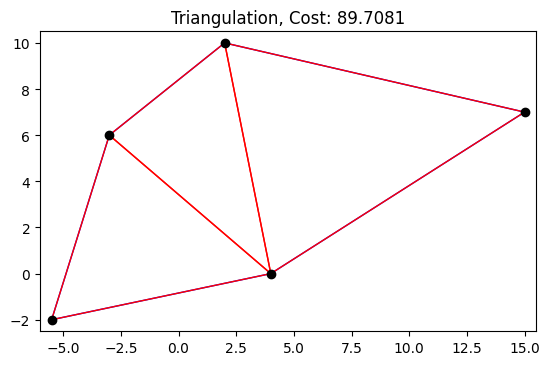

Total number of triangulations: 1


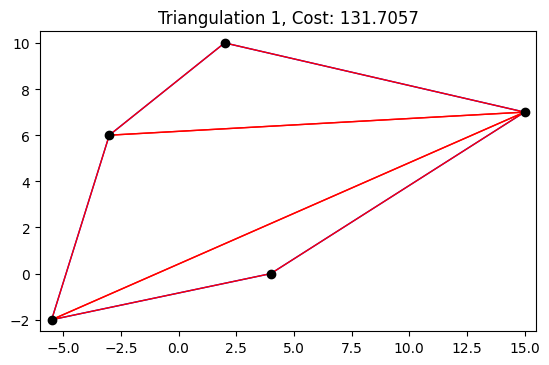

In [3]:
points = [(-5.5, -2) ,(4, 0) ,(15, 7) ,(2, 10) ,(-3, 6)]
print(f"\nTest Case 1.2:")
solve_and_visualize(points)


Test Case 2.1:
Solving for points: [(1, 0), (4, 3), (5, 7), (1, 10), (0, 8), (0, 0)]
dp: [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
gap: 2
i: 0 j: 2
k: 1 cost: 16.428004061035494
dp: [[0, 0, 16.428004061035494, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
i: 1 j: 3
k: 2 cost: 16.73887873148157
dp: [[0, 0, 16.428004061035494, 0, 0, 0], [0, 0, 0, 16.73887873148157, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
i: 2 j: 4
k: 3 cost: 12.335087491092574
dp: [[0, 0, 16.428004061035494, 0, 0, 0], [0, 0, 0, 16.73887873148157, 0, 0], [0, 0, 0, 0, 12.335087491092574, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
i: 3 j: 5
k: 4 cost: 20.28594359862068
dp: [[0, 0, 16.428004061035494, 0, 0, 0], [0, 0, 0, 16.73887873148157, 0, 0], [0, 0, 0, 0, 12.335087491092574, 0], [0, 0, 0, 0, 0, 20.28594359862068]

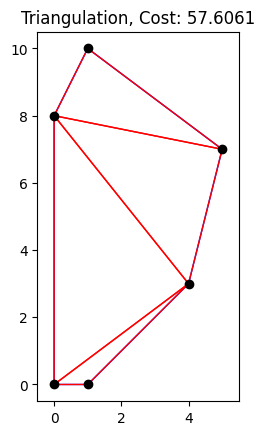

Total number of triangulations: 0


In [4]:
points = [(1, 0) ,(4, 3) ,(5, 7) ,(1, 10) ,(0, 8) ,(0, 0)]
print(f"\nTest Case 2.1:")
solve_and_visualize(points)


Test Case 2.2:
Solving for points: [(2.5, 0), (4, 3), (5, 8), (2.5, 10), (0, 6.3), (1.5, 0)]
dp: [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
gap: 2
i: 0 j: 2
k: 1 cost: 16.834648786962575
dp: [[0, 0, 16.834648786962575, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
i: 1 j: 3
k: 2 cost: 15.459492163947385
dp: [[0, 0, 16.834648786962575, 0, 0, 0], [0, 0, 0, 15.459492163947385, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
i: 2 j: 4
k: 3 cost: 12.948083201674002
dp: [[0, 0, 16.834648786962575, 0, 0, 0], [0, 0, 0, 15.459492163947385, 0, 0], [0, 0, 0, 0, 12.948083201674002, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
i: 3 j: 5
k: 4 cost: 20.99140827695098
dp: [[0, 0, 16.834648786962575, 0, 0, 0], [0, 0, 0, 15.459492163947385, 0, 0], [0, 0, 0, 0, 12.948083201674002, 0], [0, 0, 0, 0, 0, 20.991

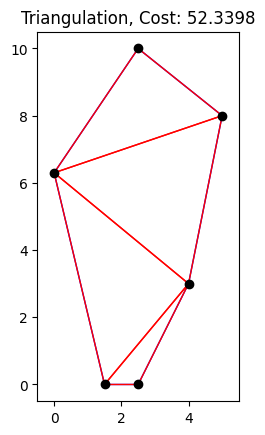

Total number of triangulations: 0


In [5]:
points = [(2.5, 0) ,(4, 3) ,(5, 8) ,(2.5, 10) ,(0, 6.3) ,(1.5, 0)]
print(f"\nTest Case 2.2:")
solve_and_visualize(points)


Test Case 3 Extra:
Solving for points: [(-2, 3), (-4, 6), (3, 5), (1, 3)]
dp: [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
gap: 2
i: 0 j: 2
k: 1 cost: 16.061783894463968
dp: [[0, 0, 16.061783894463968, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
i: 1 j: 3
k: 2 cost: 15.730446831456966
dp: [[0, 0, 16.061783894463968, 0], [0, 0, 0, 15.730446831456966], [0, 0, 0, 0], [0, 0, 0, 0]]
gap: 3
i: 0 j: 3
k: 1 cost: 28.166950001766256
dp: [[0, 0, 16.061783894463968, 28.166950001766256], [0, 0, 0, 15.730446831456966], [0, 0, 0, 0], [0, 0, 0, 0]]
k: 2 cost: 27.275375826344664
dp: [[0, 0, 16.061783894463968, 27.275375826344664], [0, 0, 0, 15.730446831456966], [0, 0, 0, 0], [0, 0, 0, 0]]
Minimum cost (dynamic programming): 27.2754
Optimal triangulation: [(0, 2, 3), (0, 1, 2)]


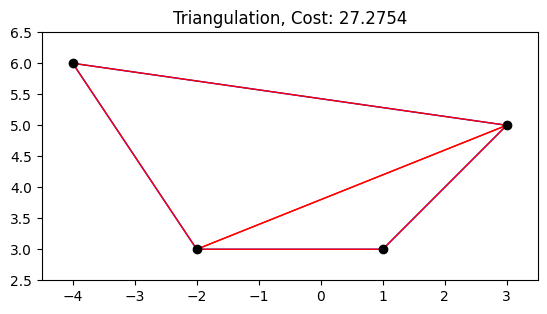

Total number of triangulations: 0


In [6]:
points = [(-2, 3) ,(-4, 6) ,(3, 5) ,(1, 3)]
print(f"\nTest Case 3 Extra:")
solve_and_visualize(points)


Test Case 4 Extra:
Solving for points: [(0, 0), (1, 0), (2, 1), (1, 2), (0, 2)]
dp: [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
gap: 2
i: 0 j: 2
k: 1 cost: 4.650281539872885
dp: [[0, 0, 4.650281539872885, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
i: 1 j: 3
k: 2 cost: 4.82842712474619
dp: [[0, 0, 4.650281539872885, 0, 0], [0, 0, 0, 4.82842712474619, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
i: 2 j: 4
k: 3 cost: 4.650281539872885
dp: [[0, 0, 4.650281539872885, 0, 0], [0, 0, 0, 4.82842712474619, 0], [0, 0, 0, 0, 4.650281539872885], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
gap: 3
i: 0 j: 3
k: 1 cost: 10.06449510224598
dp: [[0, 0, 4.650281539872885, 10.06449510224598, 0], [0, 0, 0, 4.82842712474619, 0], [0, 0, 0, 0, 4.650281539872885], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
k: 2 cost: 10.53663105724556
dp: [[0, 0, 4.650281539872885, 10.06449510224598, 0], [0, 0, 0, 4.82842712474619, 0], [0, 0, 0, 0, 4.6502815398728

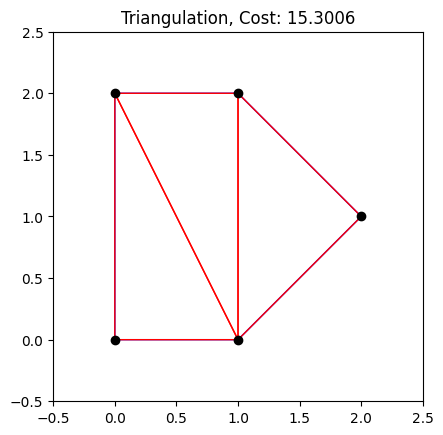

Total number of triangulations: 1


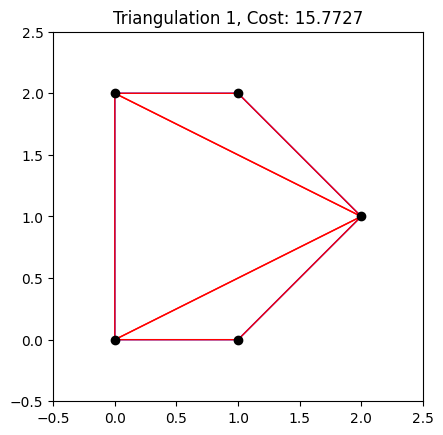

In [7]:
points = [(0, 0) ,(2, 1) ,(0, 2) ,(1, 0) ,(1, 2)]
print(f"\nTest Case 4 Extra:")
points = sort_vertices_ccw(points)
solve_and_visualize(points)